<h2> Spatial & Temporal MBA Data Tests </h2>

<h5> Andreas Freund </h5>

<h7>acf2175</h7>
<br>
<h7>4/12/22</h7>


In [3]:
# from IPython.core.display import display, HTML
from IPython.display import HTML
from IPython.core.magic import register_cell_magic

@register_cell_magic
def toggle_code(self, cell):
    display(HTML('''
        <script>code_show=true;
        function code_toggle() {
            if (code_show) { $('div.input').hide();}
            else {$('div.input').show();}
            code_show = !code_show
        }
        $(document).ready(code_toggle);
        </script>
        <button onClick="javascript:code_toggle()">Toggle code</button>'''
    ))
    return display(HTML('<p>Click on the button above to show/hide code.</p>'))

In [55]:
%%toggle_code
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import norm
from google.cloud import bigquery


os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = "/Users/andreasfreund/.config/gcloud/application_default_credentials.json"
%load_ext google.cloud.bigquery
client = bigquery.Client()

#setting max rows to print
pd.set_option('display.max_rows', 150)

# style
plt.style.use("fivethirtyeight")
%matplotlib inline




print('Executed')

<h3> SQL Queries

In [46]:
# 5th pct speed for windstream 25 mbps: nonpeak = 20.111088, peak = 18.835248, totalBoxes = 56
# 5th pct speed for windstream 100 mbps: nonpeak = 73.543872, peak = 74.440792, totalBoxes = 34
# 5th pct speed for Comcast 500 mbps: nonpeak = 139.989232, peak = 195.859112, totalBoxes = 12
# 5th pct speed for Mediacom 500 mbps: nonpeak = 422.247576, peak = 393.978344
# 5th pct speed for Frontier 500 mbps: nonpeak = 387.65412, peak = 350.104624


windstream100SQL = """
SELECT DISTINCT httpmt.unit_id, mt.ISP, mt.Technology, mt.Download,
SUM(CASE WHEN httpmt.bytes_sec/125000 <= 74.440792 THEN 1 ELSE 0 END) as LowSpeed5PctCount,
SUM(CASE WHEN httpmt.bytes_sec/125000 <= (mt.Download * .5) THEN 1 ELSE 0 END) as countBelow50PctSpeeds,
FROM `broadband-data.mba_data.curr_httpgetmt` as httpmt 
    INNER JOIN`broadband-data.mba_data.unit-profile-sept2020` as mt
    ON httpmt.unit_id=mt.unit_id
WHERE mt.download = 100 AND mt.ISP = "Windstream" 
AND (EXTRACT(HOUR FROM httpmt.dtime) >= 19) AND (EXTRACT(HOUR FROM httpmt.dtime) <=23)
GROUP BY  httpmt.unit_id, mt.ISP, mt.Technology, mt.Download
ORDER BY LowSpeed5PctCount
"""


windstream50SQL = """
SELECT DISTINCT httpmt.unit_id, mt.ISP, mt.Technology, mt.Download,
SUM(CASE WHEN httpmt.bytes_sec/125000 <= 18.835248 THEN 1 ELSE 0 END) as LowSpeed5PctCount,
SUM(CASE WHEN httpmt.bytes_sec/125000 <= (mt.Download * .5) THEN 1 ELSE 0 END) as countBelow50PctSpeeds,
FROM `broadband-data.mba_data.curr_httpgetmt` as httpmt 
    INNER JOIN`broadband-data.mba_data.unit-profile-sept2020` as mt
    ON httpmt.unit_id=mt.unit_id
WHERE mt.download = 50 AND mt.ISP = "Windstream" 
AND (EXTRACT(HOUR FROM httpmt.dtime) >= 19) AND (EXTRACT(HOUR FROM httpmt.dtime) <=23)
GROUP BY  httpmt.unit_id, mt.ISP, mt.Technology, mt.Download
ORDER BY LowSpeed5PctCount
"""

comcast500SQL = """
SELECT DISTINCT httpmt.unit_id, mt.ISP, mt.Technology, mt.Download,
SUM(CASE WHEN httpmt.bytes_sec/125000 <= 195.859112 THEN 1 ELSE 0 END) as LowSpeed5PctCount,
SUM(CASE WHEN httpmt.bytes_sec/125000 <= (mt.Download * .5) THEN 1 ELSE 0 END) as countBelow50PctSpeeds,
FROM `broadband-data.mba_data.curr_httpgetmt` as httpmt 
    INNER JOIN`broadband-data.mba_data.unit-profile-sept2020` as mt
    ON httpmt.unit_id=mt.unit_id
WHERE mt.download = 500 AND mt.ISP = "Comcast" 
AND (EXTRACT(HOUR FROM httpmt.dtime) >= 19) AND (EXTRACT(HOUR FROM httpmt.dtime) <=23)
GROUP BY  httpmt.unit_id, mt.ISP, mt.Technology, mt.Download
ORDER BY LowSpeed5PctCount
"""

mediacom500SQL = """
SELECT DISTINCT httpmt.unit_id, mt.ISP, mt.Technology, mt.Download,
SUM(CASE WHEN httpmt.bytes_sec/125000 <= 393.978344 THEN 1 ELSE 0 END) as LowSpeed5PctCount,
SUM(CASE WHEN httpmt.bytes_sec/125000 <= (mt.Download * .5) THEN 1 ELSE 0 END) as countBelow50PctSpeeds,
FROM `broadband-data.mba_data.curr_httpgetmt` as httpmt 
    INNER JOIN`broadband-data.mba_data.unit-profile-sept2020` as mt
    ON httpmt.unit_id=mt.unit_id
WHERE mt.download = 500 AND mt.ISP = "Mediacom" 
AND (EXTRACT(HOUR FROM httpmt.dtime) >= 19) AND (EXTRACT(HOUR FROM httpmt.dtime) <=23)
GROUP BY  httpmt.unit_id, mt.ISP, mt.Technology, mt.Download
ORDER BY LowSpeed5PctCount


"""

frontier500SQL = """
SELECT DISTINCT httpmt.unit_id, mt.ISP, mt.Technology, mt.Download,
SUM(CASE WHEN httpmt.bytes_sec/125000 <= 350.104624 THEN 1 ELSE 0 END) as LowSpeed5PctCount,
SUM(CASE WHEN httpmt.bytes_sec/125000 <= (mt.Download * .5) THEN 1 ELSE 0 END) as countBelow50PctSpeeds,
FROM `broadband-data.mba_data.curr_httpgetmt` as httpmt 
    INNER JOIN`broadband-data.mba_data.unit-profile-sept2020` as mt
    ON httpmt.unit_id=mt.unit_id
WHERE mt.download = 500 AND mt.ISP = "Frontier" 
AND (EXTRACT(HOUR FROM httpmt.dtime) >= 19) AND (EXTRACT(HOUR FROM httpmt.dtime) <=23)
GROUP BY  httpmt.unit_id, mt.ISP, mt.Technology, mt.Download
ORDER BY LowSpeed5PctCount


"""



comcast500 = client.query(comcast500SQL).to_dataframe()
windstream100 = client.query(windstream100SQL).to_dataframe()
windstream50 = client.query(windstream50SQL).to_dataframe()
mediacom500 = client.query(mediacom500SQL).to_dataframe()
frontier500 = client.query(frontier500SQL).to_dataframe()

print('executed')



executed


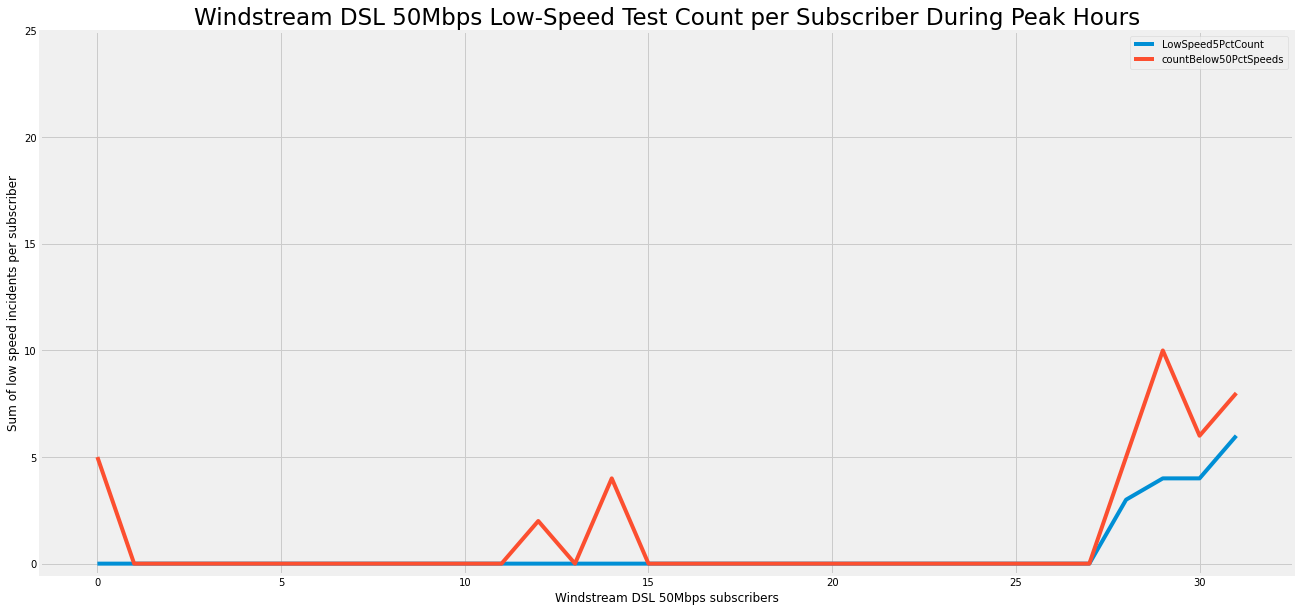

In [47]:
ax = windstream50.plot(y = ['LowSpeed5PctCount', 'countBelow50PctSpeeds'],  kind = 'line',
                   fontsize = 10, rot = 0, figsize = (20,10), grid = True)

plt.yticks(np.arange(0, 30, 5))

ax.set_xlabel('Windstream DSL 50Mbps subscribers')
ax.set_ylabel('Sum of low speed incidents per subscriber')
ax.set_title('Windstream DSL 50Mbps Low-Speed Test Count per Subscriber During Peak Hours', fontsize=23)


plt.show()

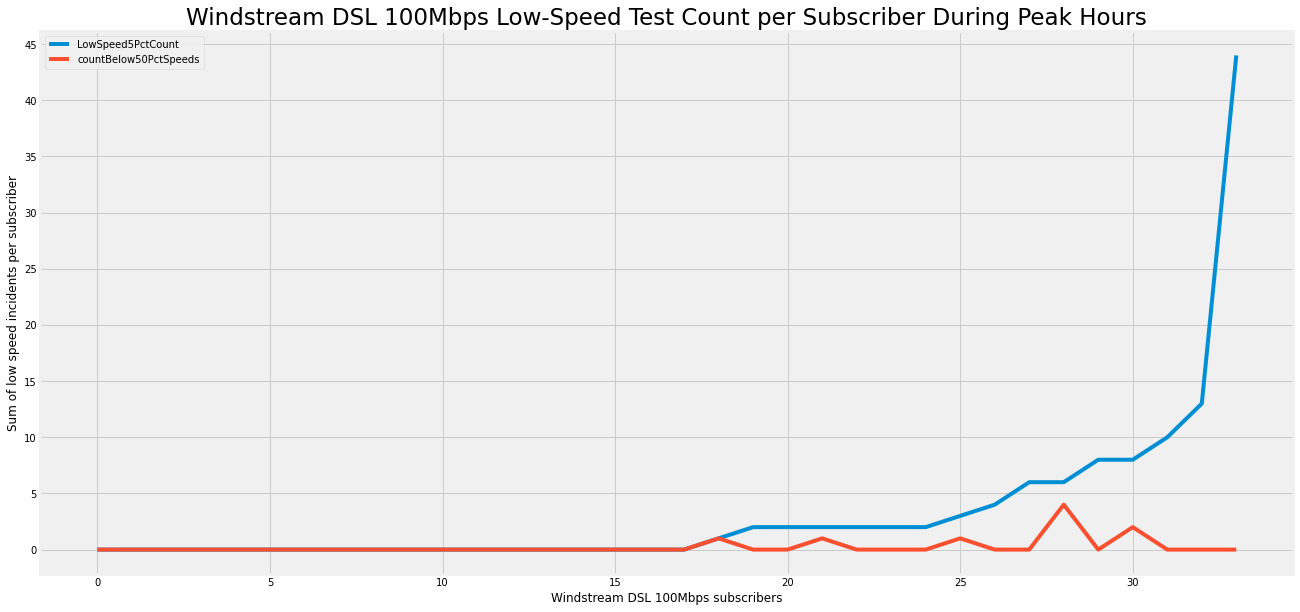

In [48]:
ax = windstream100.plot(y = ['LowSpeed5PctCount', 'countBelow50PctSpeeds'],  kind = 'line',
                   fontsize = 10, rot = 0, figsize = (20,10), grid = True)

plt.yticks(np.arange(0, 50, 5))


ax.set_xlabel('Windstream DSL 100Mbps subscribers')
ax.set_ylabel('Sum of low speed incidents per subscriber')
ax.set_title('Windstream DSL 100Mbps Low-Speed Test Count per Subscriber During Peak Hours', fontsize=23)


plt.show()

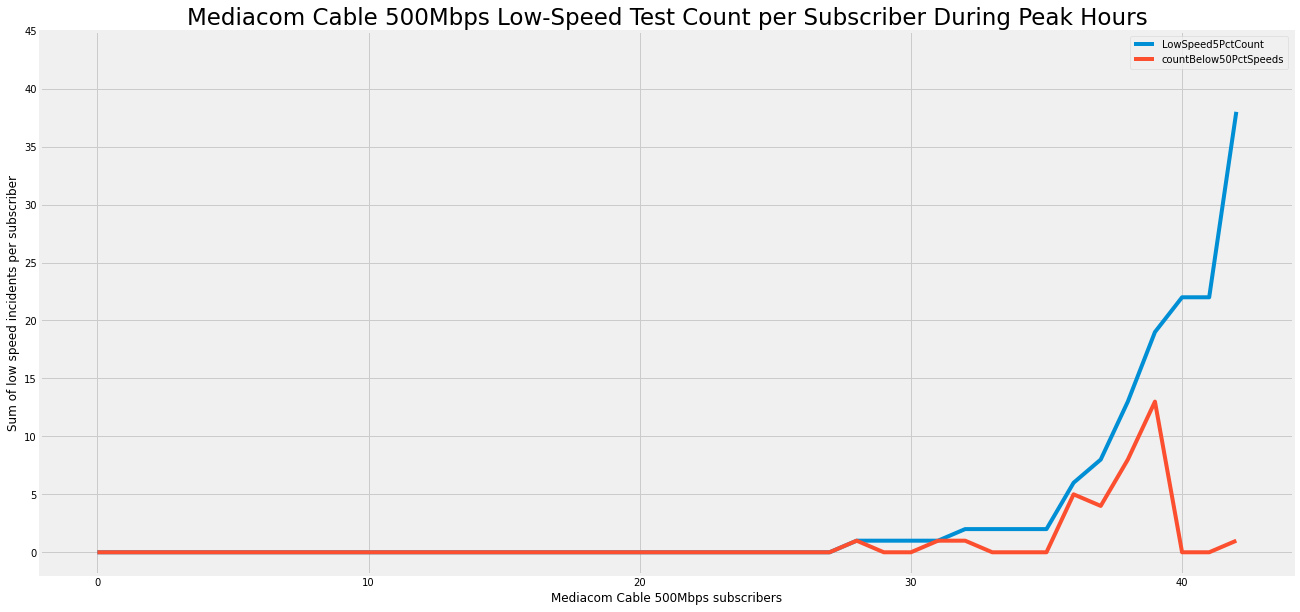

In [49]:
ax = mediacom500.plot(y = ['LowSpeed5PctCount', 'countBelow50PctSpeeds'],  kind = 'line',
                   fontsize = 10, rot = 0, figsize = (20,10), grid = True)

plt.yticks(np.arange(0, 50, 5))
# plt.axhline(y = 100, color = 'pink', linestyle = '-')


ax.set_xlabel('Mediacom Cable 500Mbps subscribers')
ax.set_ylabel('Sum of low speed incidents per subscriber')
ax.set_title('Mediacom Cable 500Mbps Low-Speed Test Count per Subscriber During Peak Hours', fontsize=23)


plt.show()

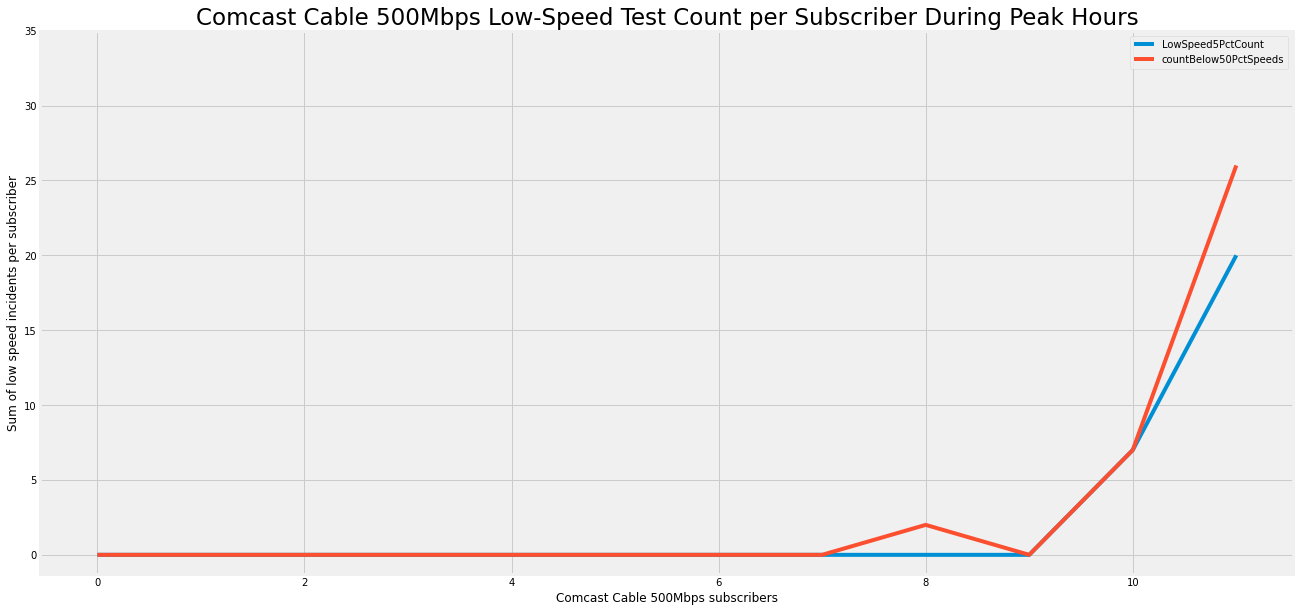

In [50]:
ax = comcast500.plot(y = ['LowSpeed5PctCount', 'countBelow50PctSpeeds'],  kind = 'line',
                   fontsize = 10, rot = 0, figsize = (20,10), grid = True)

plt.yticks(np.arange(0, 40, 5))
# plt.axhline(y = 100, color = 'pink', linestyle = '-')


ax.set_xlabel('Comcast Cable 500Mbps subscribers')
ax.set_ylabel('Sum of low speed incidents per subscriber')
ax.set_title('Comcast Cable 500Mbps Low-Speed Test Count per Subscriber During Peak Hours', fontsize=23)


plt.show()

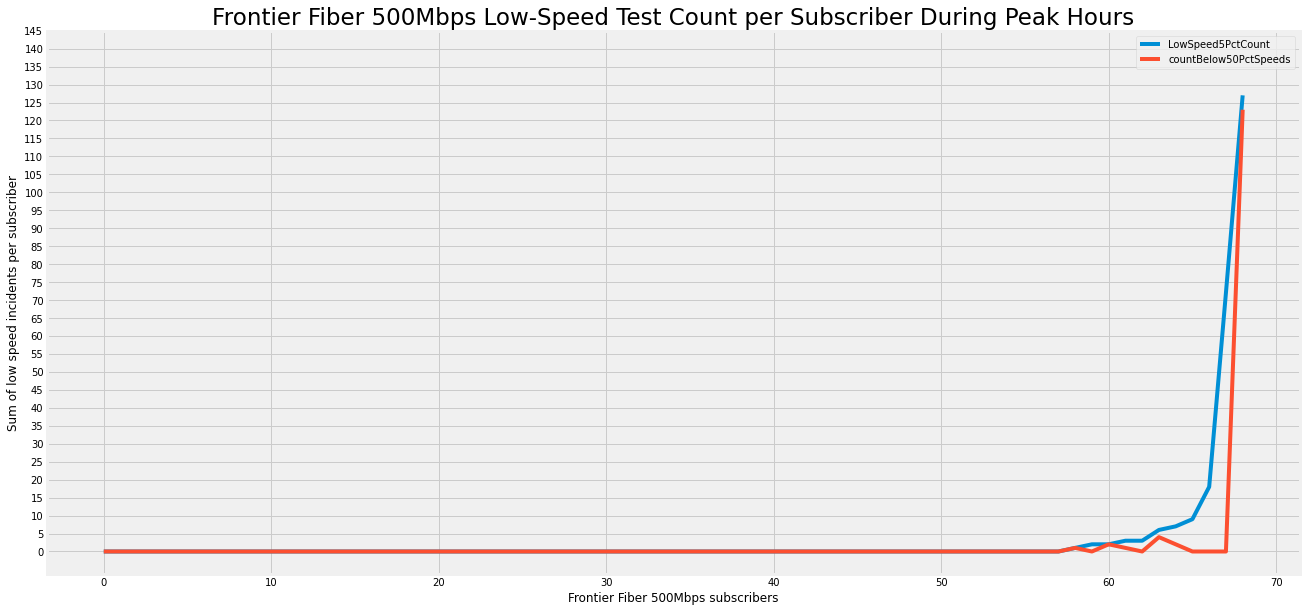

In [54]:
ax = frontier500.plot(y = ['LowSpeed5PctCount', 'countBelow50PctSpeeds'],  kind = 'line',
                   fontsize = 10, rot = 0, figsize = (20,10), grid = True)

plt.yticks(np.arange(0, 150, 5))
# plt.axhline(y = 100, color = 'pink', linestyle = '-')


ax.set_xlabel('Frontier Fiber 500Mbps subscribers')
ax.set_ylabel('Sum of low speed incidents per subscriber')
ax.set_title('Frontier Fiber 500Mbps Low-Speed Test Count per Subscriber During Peak Hours', fontsize=23)


plt.show()